# 1. AutoML - sklearn classifier
https://automl.github.io/auto-sklearn/master/ 

In [8]:
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=5000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=50)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S18",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head(10)


Xsensor=sensor_failure_all[[ 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8', 'AGE_OF_EQUIPMENT']]
Xsensor

,S15,S17,S13,S5,S16,S19,S18,S8,AGE_OF_EQUIPMENT
143,0.000000,0.000000,0.000000,0.000000,8.892400,0.9,170.400000,0.000000,1023
1452,0.000000,0.000000,0.000000,0.000000,8.704800,0.0,4.400000,0.000000,1121
1974,0.000000,0.000000,23.614483,7202.413793,3.282400,42.7,57.100000,89.084138,832
2882,0.000000,0.000000,24.680690,5257.103448,3.731000,25.5,43.100000,45.019310,1449
2940,0.000000,0.000000,29.906154,5233.307692,8.413200,0.1,678.000000,1.092308,9996
4227,0.000000,0.000000,24.430000,3494.000000,6.059000,0.9,249.100000,271.170000,1252
4851,0.000000,0.000000,28.340000,2522.000000,10.472000,0.0,11.400000,43.050000,1205
0,11.088000,145.223448,39.340000,3501.000000,8.426869,1.9,24.610345,0.000000,880
1,8.877943,187.573214,39.200000,3489.000000,6.483714,1.9,24.671429,0.000000,881
2,8.676444,148.363704,38.870000,3459.000000,6.159659,2.0,24.733333,0.000000,882


In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xsensor, ys, random_state=1,test_size=0.33)

### install the autosklearn libs

In [4]:
pip install auto-sklearn

     |████████████████████████████████| 6.1MB 3.9MB/s 
     |████████████████████████████████| 22.3MB 2.0MB/s 
     |████████████████████████████████| 686kB 45.3MB/s 
     |████████████████████████████████| 952kB 43.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.0MB 33.0MB/s 
     |████████████████████████████████| 266kB 46.8MB/s 
  Created wheel for ConfigSpace: filename=ConfigSpace-0.4.18-cp37-cp37m-linux_x86_64.whl size=2879804 sha256=f5467a74fed08aee439933a5a9968a4c6e94e0412bd1186319ade8a5475e8d6b
  Stored in directory: /root/.cache/pip/wheels/39/ea/40/d93931850f700427db0a84180829c709d30484c9475040c7bd
Successfully built ConfigSpace
  Created wheel for auto-sklearn: filename=auto_sklearn-0.12.5-cp37-none-any.whl size=6367617 sha256=72f813cad313dc31d06c440d4f5b6d0e02c5a4ddf44b658c23e72420dcfe0f46
  Stored in directory: /root/.cache/pip/wheels/ae/76/5c/79d07

In [6]:
pip install dask distributed

In [4]:
pip install dask distributed --upgrade

     |████████████████████████████████| 942kB 4.4MB/s 
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.3.1)
     |████████████████████████████████| 112kB 21.4MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [8]:
%pip install "dask[complete]"

In [10]:
%pip install -U tornado

     |████████████████████████████████| 430kB 4.9MB/s 
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1


## choose a classifier, but search for the best performing one 

In [14]:

# example of auto-sklearn for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from autosklearn.classification import AutoSklearnClassifier
# define dataset
#X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(Xsensor, ys, random_state=1,test_size=0.33)

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define search
model = AutoSklearnClassifier(time_left_for_this_task=30, per_run_time_limit=30, n_jobs=5)  #ensemble_size=1,  for restricting the ml models
# perform the search
model.fit(Xsensor, ys)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_hat = model.predict(X_test)
acc = accuracy_score(y_test, y_hat)
print("Accuracy: %.3f" % acc)

auto-sklearn results:
  Dataset name: 51011aca-909d-11eb-8a43-0242ac1c0002
  Metric: accuracy
  Best validation score: 1.000000
  Number of target algorithm runs: 12
  Number of successful target algorithm runs: 8
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 4
  Number of target algorithms that exceeded the memory limit: 0

Accuracy: 1.000


## show model list

In [17]:
  print("\n: ",model.show_models())
#params=model.automl_
#params


:  [(0.260000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'select_rates_classification', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'entropy', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.562561668029056, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 2, 'classifier:extra_trees:min_samples_split': 15, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'feature_preprocessor:select_ra

## show hyperparameters of an algo

In [19]:
model.cv_results_

{'budgets': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'mean_fit_time': array([ 9.30589795,  3.76604748,  7.86594081,  4.77178764,  3.74208736,
         7.80775356,  8.44734836, 10.28755617,  9.15750837,  7.12399316,
         5.1413672 ,  3.13147092]),
 'mean_test_score': array([1.  , 0.9 , 1.  , 0.95, 1.  , 0.9 , 1.  , 1.  , 0.  , 0.  , 0.  ,
        0.  ]),
 'param_balancing:strategy': masked_array(data=['none', 'none', 'none', 'weighting', 'none', 'none',
                    'weighting', 'none', 'weighting', 'none', 'weighting',
                    'none'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='N/A',
             dtype='<U9'),
 'param_classifier:__choice__': masked_array(data=['random_forest', 'gradient_boosting', 'extra_trees',
                    'lda', 'adaboost', 'gradient_boosting',
                    'gradient_boosting', 'random_forest', 'random_fores

In [ ]:
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
#print(model.sprint_statistics())
model.cv_results_


{'budgets': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'mean_fit_time': array([14.58359694,  6.96267056, 15.10797715, 14.88934565,  7.30585146,
        13.60739636,  6.2647438 ,  6.65127277,  8.35522103, 19.14082193,
         7.72099543,  8.89683819,  6.20679712, 11.24898481, 11.11343575,
         6.63667345,  9.61146069,  8.17350054,  6.21133637,  5.20444226]),
 'mean_test_score': array([0.84615385, 0.15384615, 0.84615385, 0.84615385, 0.84615385,
        0.69230769, 0.84615385, 0.84615385, 0.84615385, 0.        ,
        0.92307692, 0.76923077, 1.        , 0.        , 0.        ,
        0.92307692, 0.84615385, 0.        , 0.        , 0.        ]),
 'param_balancing:strategy': masked_array(data=['none', 'weighting', 'none', 'none', 'weighting',
                    'weighting', 'none', 'weighting', 'none', 'weighting',
                    'none', 'weighting', 'none', 'none', 'none', 'none'

In [ ]:
#!pip install dask distributed --upgrade

#pip install auto-sklearn

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of AutoSklearnClassifier(n_jobs=8, per_run_time_limit=30,
                      time_left_for_this_task=30)>

In [ ]:
#pip install auto-sklearn==0.12.0

In [ ]:
#pip install auto-sklearn==0.12.3

In [ ]:
#import autosklearn

In [ ]:
#import autosklearn.classification

In [ ]:
#pip install -r requirements.txt

# 2. AutoML - H20 model selection and evaluation
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html#model-metrics 

In [6]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.8MB 82kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=b18f1c17c8ff096e4074375102cc58499dd0b03b0cae86454fec07eefedff425
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


In [38]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np


h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()


X_train_h20=h2o.H2OFrame(X_train)

y_train_h20=h2o.H2OFrame(y_train.values)

y_train_int=y_train.astype('int64')

#y_train_int=np.arange(y_train).tolist()[0]

# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=15, seed=1)
aml.train(x=x, y=y  , training_frame=train)

# View the AutoML Leaderboard

#lb = aml.leaderboard
#lb.head(rows=lb.nrows) 

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,32 mins 13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_wxmx96
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.053 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


## plot leader board

In [40]:
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210329_135111,0.787241,0.551977,0.806634,0.314085,0.432965,0.187459
StackedEnsemble_BestOfFamily_AutoML_20210329_135111,0.785226,0.554404,0.804158,0.330457,0.433957,0.188319
GBM_5_AutoML_20210329_135111,0.78219,0.558353,0.801738,0.319658,0.435512,0.18967
GBM_grid__1_AutoML_20210329_135111_model_1,0.77786,0.564655,0.795359,0.33376,0.438088,0.191921
GBM_2_AutoML_20210329_135111,0.777673,0.562514,0.796364,0.334056,0.437583,0.191479
GBM_1_AutoML_20210329_135111,0.777294,0.562744,0.799184,0.356261,0.437727,0.191605
GBM_3_AutoML_20210329_135111,0.775488,0.564794,0.794892,0.327971,0.438722,0.192477
GBM_4_AutoML_20210329_135111,0.77248,0.569483,0.792582,0.336913,0.440873,0.194369
XGBoost_3_AutoML_20210329_135111,0.765302,0.57678,0.784152,0.334265,0.444144,0.197264
DRF_1_AutoML_20210329_135111,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222


In [19]:
'python_obj = [1, 2, 2.5, -100.9, 0]
frame = h2o.H2OFrame(python_obj)
frame 




Parse progress: |█████████████████████████████████████████████████████████| 100%


C1
1
2
2.5
-100.9
0


In [32]:
X_train_h20=h2o.H2OFrame(X_train)
X_train_h20.types

Parse progress: |█████████████████████████████████████████████████████████| 100%


{'AGE_OF_EQUIPMENT': 'int',
 'S13': 'real',
 'S15': 'real',
 'S16': 'real',
 'S17': 'real',
 'S18': 'real',
 'S19': 'real',
 'S5': 'real',
 'S8': 'real'}

In [31]:
y_train_h20=h2o.H2OFrame(y_train.values)
y_train_h20.types

Parse progress: |█████████████████████████████████████████████████████████| 100%


{'C1': 'int'}

In [ ]:
#preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

preds

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.738796,0.261204
0,0.722376,0.277624
1,0.592636,0.407364
1,0.342497,0.657503
0,0.742175,0.257825
1,0.209384,0.790616
1,0.251303,0.748697
0,0.645424,0.354576
1,0.530489,0.469511
0,0.784955,0.215045


## zeige die leader models an mit ID

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_AutoML_20210326_160544',
 'StackedEnsemble_BestOfFamily_AutoML_20210326_160544',
 'GBM_5_AutoML_20210326_160544',
 'GBM_grid__1_AutoML_20210326_160544_model_1',
 'GBM_2_AutoML_20210326_160544',
 'GBM_1_AutoML_20210326_160544',
 'GBM_3_AutoML_20210326_160544',
 'GBM_4_AutoML_20210326_160544',
 'XGBoost_3_AutoML_20210326_160544',
 'DRF_1_AutoML_20210326_160544',
 'XGBoost_grid__1_AutoML_20210326_160544_model_2',
 'XRT_1_AutoML_20210326_160544',
 'XGBoost_grid__1_AutoML_20210326_160544_model_1',
 'XGBoost_2_AutoML_20210326_160544',
 'XGBoost_1_AutoML_20210326_160544',
 'DeepLearning_1_AutoML_20210326_160544',
 'GLM_1_AutoML_20210326_160544']

## wähle ein model aus

In [ ]:
xgboost=h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
xgboost

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20210326_160544


Model Summary: 


,,number_of_trees
0,,36.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1413701823742498
RMSE: 0.37599226371595706
LogLoss: 0.44285519976026483
Mean Per-Class Error: 0.1933393141525651
AUC: 0.8908197435272183
AUCPR: 0.9006806443656584
Gini: 0.7816394870544365

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45908662755238383: 


,,0,1,Error,Rate
0,0,3434.0,1271.0,0.2701,(1271.0/4705.0)
1,1,681.0,4614.0,0.1286,(681.0/5295.0)
2,Total,4115.0,5885.0,0.1952,(1952.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.459087,0.825403,223.0
1,max f2,0.291556,0.891544,295.0
2,max f0point5,0.589897,0.833802,170.0
3,max accuracy,0.509437,0.806800,202.0
4,max precision,0.991352,1.000000,0.0
5,max recall,0.036857,1.000000,392.0
6,max specificity,0.991352,1.000000,0.0
7,max absolute_mcc,0.533826,0.612286,191.0
8,max min_per_class_accuracy,0.521231,0.804676,197.0
9,max mean_per_class_accuracy,0.533826,0.806661,191.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.961169,1.888574,1.888574,1.000,0.973783,1.000000,0.973783,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.947281,1.869688,1.879131,0.990,0.954108,0.995000,0.963946,0.018697,0.037583,86.968839,87.913126,0.037370
2,3,0.03,0.936256,1.888574,1.882279,1.000,0.941440,0.996667,0.956444,0.018886,0.056468,88.857413,88.227888,0.056256
3,4,0.04,0.928100,1.888574,1.883853,1.000,0.932325,0.997500,0.950414,0.018886,0.075354,88.857413,88.385269,0.075142
4,5,0.05,0.919990,1.888574,1.884797,1.000,0.924035,0.998000,0.945138,0.018886,0.094240,88.857413,88.479698,0.094027
5,6,0.10,0.878510,1.847025,1.865911,0.978,0.898938,0.988000,0.922038,0.092351,0.186591,84.702550,86.591124,0.184041
6,7,0.15,0.836062,1.748820,1.826881,0.926,0.857359,0.967333,0.900479,0.087441,0.274032,74.881964,82.688071,0.263618
7,8,0.20,0.796621,1.711048,1.797923,0.906,0.816629,0.952000,0.879516,0.085552,0.359585,71.104816,79.792257,0.339181
8,9,0.30,0.712597,1.644948,1.746931,0.871,0.755238,0.925000,0.838090,0.164495,0.524079,64.494806,74.693107,0.476258
9,10,0.40,0.628174,1.435316,1.669027,0.760,0.670569,0.883750,0.796210,0.143532,0.667611,43.531634,66.902738,0.568780




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.19726402132023332
RMSE: 0.44414414475509334
LogLoss: 0.5767796759842727
Mean Per-Class Error: 0.304499663328045
AUC: 0.7653022170174377
AUCPR: 0.784151873451893
Gini: 0.5306044340348754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.356167311668396: 


,,0,1,Error,Rate
0,0,2218.0,2487.0,0.5286,(2487.0/4705.0)
1,1,741.0,4554.0,0.1399,(741.0/5295.0)
2,Total,2959.0,7041.0,0.3228,(3228.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.356167,0.738327,267.0
1,max f2,0.109079,0.856822,367.0
2,max f0point5,0.618735,0.719084,156.0
3,max accuracy,0.510626,0.695500,202.0
4,max precision,0.991146,1.000000,0.0
5,max recall,0.028367,1.000000,393.0
6,max specificity,0.991146,1.000000,0.0
7,max absolute_mcc,0.567911,0.391007,179.0
8,max min_per_class_accuracy,0.532547,0.693296,193.0
9,max mean_per_class_accuracy,0.553338,0.695500,185.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.959810,1.813031,1.813031,0.960,0.973074,0.960000,0.973074,0.018130,0.018130,81.303116,81.303116,0.017280
1,2,0.02,0.948646,1.813031,1.813031,0.960,0.953734,0.960000,0.963404,0.018130,0.036261,81.303116,81.303116,0.034560
2,3,0.03,0.935275,1.680831,1.768964,0.890,0.942162,0.936667,0.956324,0.016808,0.053069,68.083097,76.896443,0.049031
3,4,0.04,0.925188,1.794145,1.775260,0.950,0.929767,0.940000,0.949684,0.017941,0.071010,79.414542,77.525968,0.065909
4,5,0.05,0.915122,1.737488,1.767705,0.920,0.920456,0.936000,0.943839,0.017375,0.088385,73.748820,76.770538,0.081584
5,6,0.10,0.871981,1.680831,1.724268,0.890,0.893065,0.913000,0.918452,0.084042,0.172427,68.083097,72.426818,0.153936
6,7,0.15,0.831186,1.503305,1.650614,0.796,0.851011,0.874000,0.895971,0.075165,0.247592,50.330500,65.061379,0.207422
7,8,0.20,0.792202,1.484419,1.609065,0.786,0.812203,0.852000,0.875029,0.074221,0.321813,48.441926,60.906516,0.258901
8,9,0.30,0.707477,1.346553,1.521561,0.713,0.750542,0.805667,0.833534,0.134655,0.456468,34.655335,52.156122,0.332558
9,10,0.40,0.623303,1.218130,1.445703,0.645,0.665619,0.765500,0.791555,0.121813,0.578281,21.813031,44.570349,0.378919




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6726,0.012254591,0.667,0.685,0.6575,0.6855,0.668
1,auc,0.7653938,0.008786047,0.7753655,0.76802933,0.75191116,0.7626508,0.7690122
2,aucpr,0.78427947,0.008076913,0.79387665,0.7873283,0.7792304,0.78773326,0.7732285
3,err,0.3274,0.012254591,0.333,0.315,0.3425,0.3145,0.332
4,err_count,654.8,24.509182,666.0,630.0,685.0,629.0,664.0
5,f0point5,0.6757135,0.014915849,0.6689246,0.6889647,0.6673022,0.6939449,0.65943116
6,f1,0.74012476,0.008316128,0.74004686,0.74678457,0.7410208,0.7464732,0.72629845
7,f2,0.8184405,0.011599753,0.8280922,0.8151983,0.83305,0.8076051,0.80825686
8,lift_top_group,1.831507,0.050596446,1.8975332,1.7757009,1.8535681,1.8450185,1.7857143
9,logloss,0.57677966,0.008568456,0.5658206,0.57302994,0.58839256,0.5814788,0.57517654



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-03-26 16:06:13,6.297 sec,0.0,0.500000,0.693147,0.500000,0.529500,1.000000,0.4705
1,,2021-03-26 16:06:14,6.451 sec,5.0,0.437401,0.567810,0.801134,0.814421,1.813031,0.2888
2,,2021-03-26 16:06:14,6.596 sec,10.0,0.416541,0.523656,0.830877,0.844652,1.869688,0.2632
3,,2021-03-26 16:06:14,6.725 sec,15.0,0.406335,0.502196,0.846243,0.859522,1.888574,0.2450
4,,2021-03-26 16:06:14,6.859 sec,20.0,0.397424,0.483777,0.859583,0.871953,1.888574,0.2341
5,,2021-03-26 16:06:14,7.000 sec,25.0,0.386635,0.462954,0.875796,0.886223,1.888574,0.2105
6,,2021-03-26 16:06:14,7.136 sec,30.0,0.382275,0.454373,0.881279,0.891556,1.888574,0.2034
7,,2021-03-26 16:06:14,7.279 sec,35.0,0.376392,0.443623,0.890303,0.900283,1.888574,0.1965
8,,2021-03-26 16:06:15,7.370 sec,36.0,0.375992,0.442855,0.890820,0.900681,1.888574,0.1952



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x26,1958.709351,1.000000,0.219449
1,x28,1008.096191,0.514674,0.112945
2,x23,753.070007,0.384473,0.084372
3,x6,735.273438,0.375387,0.082378
4,x25,616.882141,0.314943,0.069114
5,x27,545.813599,0.278660,0.061152
6,x1,365.079315,0.186388,0.040903
7,x4,290.474304,0.148299,0.032544
8,x18,283.921997,0.144954,0.031810
9,x22,271.967651,0.138850,0.030471



See the whole table with table.as_data_frame()


## show the parameters for the model
https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [ ]:
xgboost.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

convert to xgboost normal parameter list

In [ ]:
xgboost.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 36,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 3,
  'silent': True,
  'subsample': 0.8,
  'tree_method': 'exact'},
 36)

In [ ]:
xgboost.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45908662755238383: 


,,0,1,Error,Rate
0,0,3434.0,1271.0,0.2701,(1271.0/4705.0)
1,1,681.0,4614.0,0.1286,(681.0/5295.0)
2,Total,4115.0,5885.0,0.1952,(1952.0/10000.0)


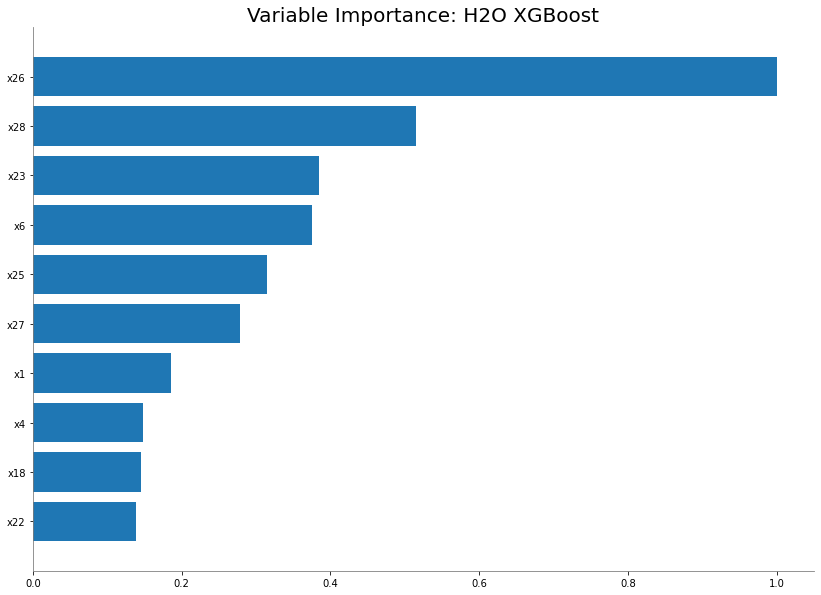

In [ ]:

xgboost.varimp_plot()

In [ ]:
test

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


In [ ]:
# Get leaderboard with `extra_columns` = 'ALL'
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210325_131758,0.78236,0.559681,0.798993,0.312938,0.435919,0.190026,578,0.014972,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210325_131758,0.778067,0.563512,0.79538,0.323957,0.437799,0.191668,595,0.011106,StackedEnsemble
XGBoost_3_AutoML_20210325_131758,0.765302,0.57678,0.784152,0.334265,0.444144,0.197264,693,0.002781,XGBoost
DRF_1_AutoML_20210325_131758,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222,1848,0.0113,DRF
XGBoost_2_AutoML_20210325_131758,0.755459,0.60549,0.772642,0.33953,0.454056,0.206167,817,0.003136,XGBoost
XGBoost_1_AutoML_20210325_131758,0.745481,0.621079,0.759972,0.359974,0.45988,0.21149,894,0.003152,XGBoost
GLM_1_AutoML_20210325_131758,0.682648,0.63852,0.680715,0.397234,0.472683,0.223429,1161,0.002124,GLM


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210325_131758,0.78236,0.559681,0.798993,0.312938,0.435919,0.190026,578,0.014972,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210325_131758,0.778067,0.563512,0.79538,0.323957,0.437799,0.191668,595,0.011106,StackedEnsemble
XGBoost_3_AutoML_20210325_131758,0.765302,0.57678,0.784152,0.334265,0.444144,0.197264,693,0.002781,XGBoost
DRF_1_AutoML_20210325_131758,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222,1848,0.0113,DRF
XGBoost_2_AutoML_20210325_131758,0.755459,0.60549,0.772642,0.33953,0.454056,0.206167,817,0.003136,XGBoost
XGBoost_1_AutoML_20210325_131758,0.745481,0.621079,0.759972,0.359974,0.45988,0.21149,894,0.003152,XGBoost
GLM_1_AutoML_20210325_131758,0.682648,0.63852,0.680715,0.397234,0.472683,0.223429,1161,0.002124,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_AutoML_20210325_131758


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5194420578732638: 




,,0,1,Error,Rate
0,0,4587.0,118.0,0.0251,(118.0/4705.0)
1,1,113.0,5182.0,0.0213,(113.0/5295.0)
2,Total,4700.0,5300.0,0.0231,(231.0/10000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

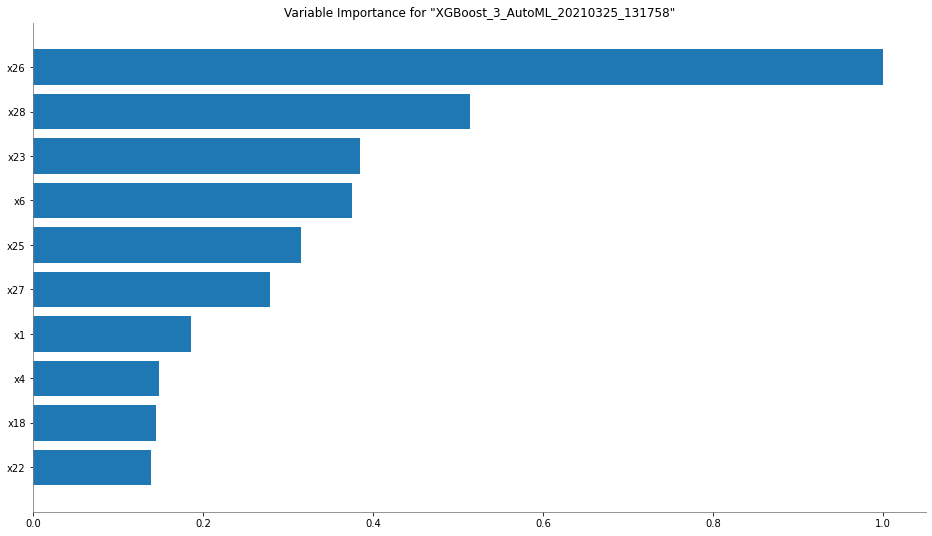

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

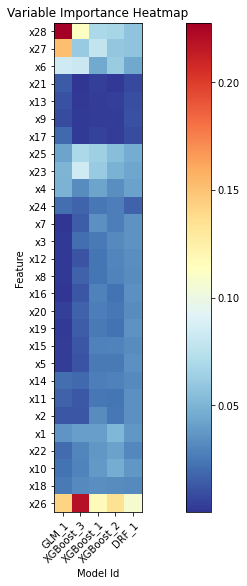

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

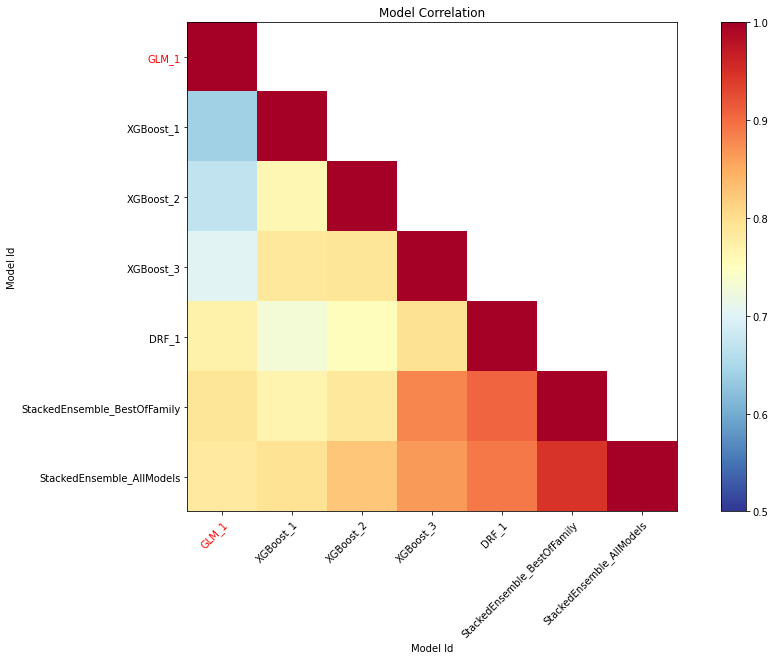

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

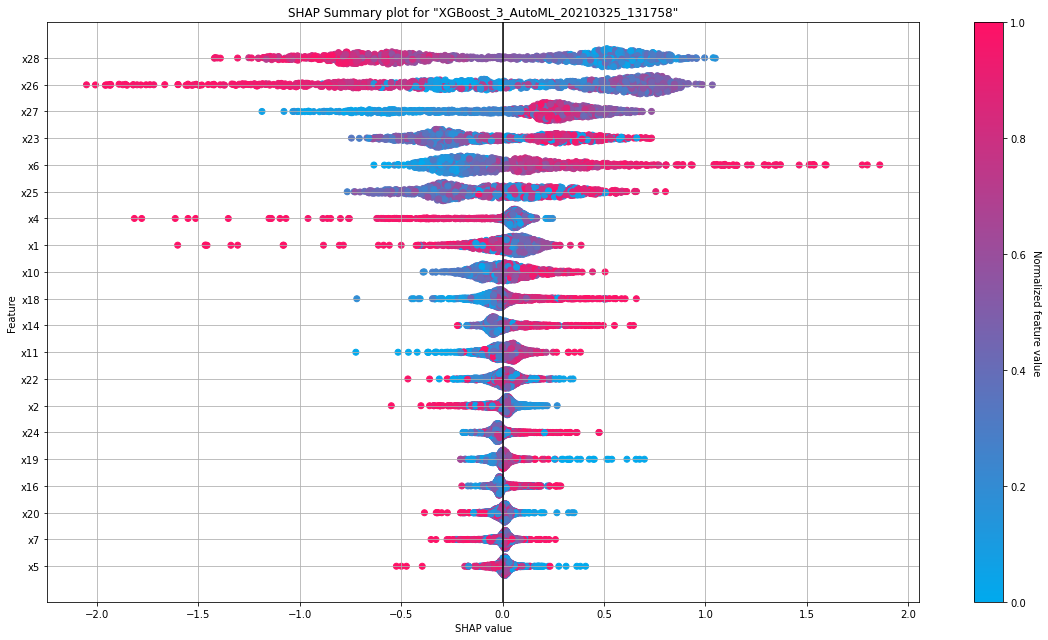

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

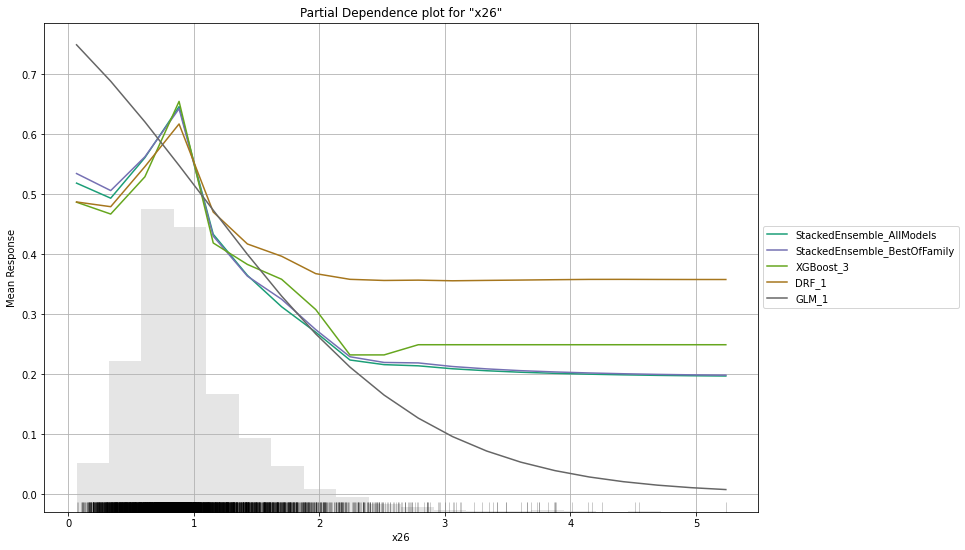

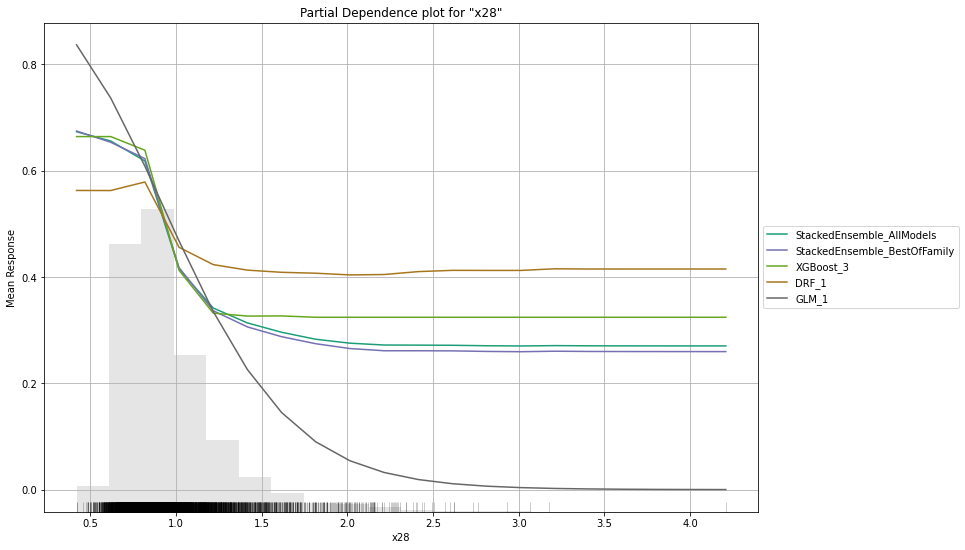

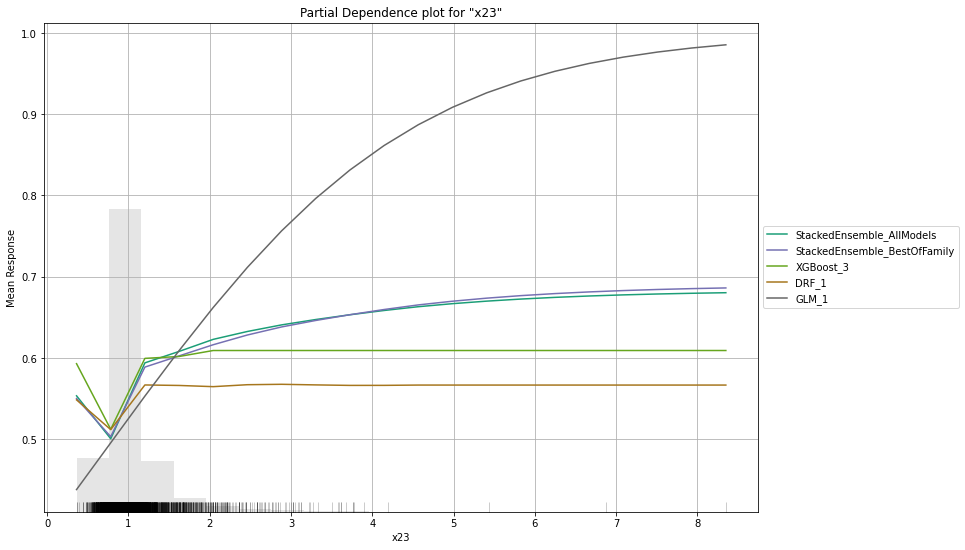

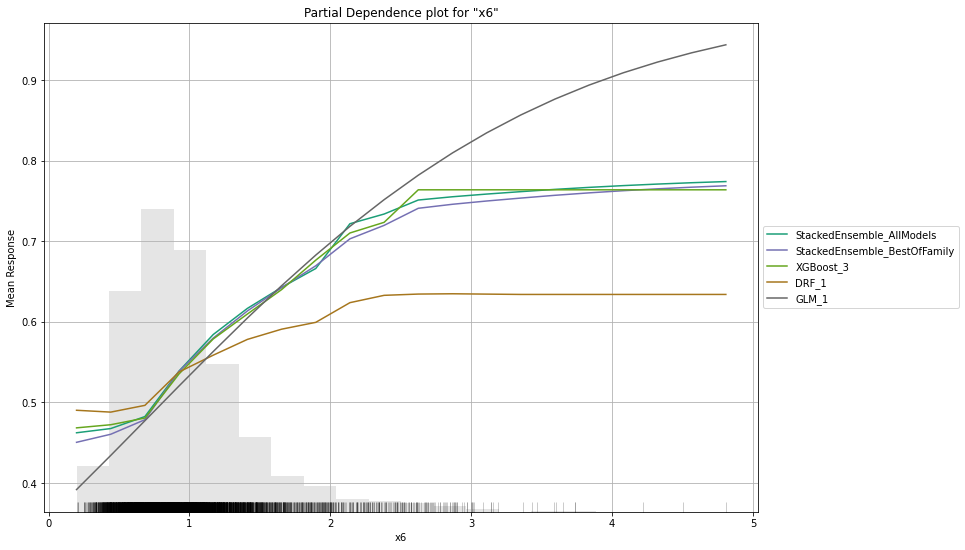

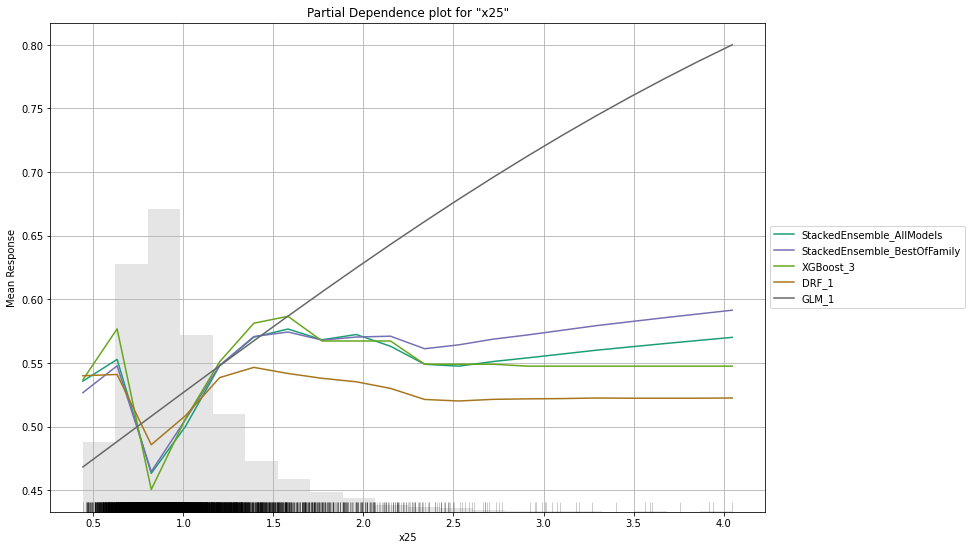




Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5194420578732638: 


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210325_131758,0.78236,0.559681,0.798993,0.312938,0.435919,0.190026,578,0.014972,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210325_131758,0.778067,0.563512,0.79538,0.323957,0.437799,0.191668,595,0.011106,StackedEnsemble
XGBoost_3_AutoML_20210325_131758,0.765302,0.57678,0.784152,0.334265,0.444144,0.197264,693,0.002781,XGBoost
DRF_1_AutoML_20210325_131758,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222,1848,0.0113,DRF
XGBoost_2_AutoML_20210325_131758,0.755459,0.60549,0.772642,0.33953,0.454056,0.206167,817,0.003136,XGBoost
XGBoost_1_AutoML_20210325_131758,0.745481,0.621079,0.759972,0.359974,0.45988,0.21149,894,0.003152,XGBoost
GLM_1_AutoML_20210325_131758,0.682648,0.63852,0.680715,0.397234,0.472683,0.223429,1161,0.002124,GLM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_AutoML_20210325_131758

,,0,1,Error,Rate
0,0,4587.0,118.0,0.0251,(118.0/4705.0)
1,1,113.0,5182.0,0.0213,(113.0/5295.0)
2,Total,4700.0,5300.0,0.0231,(231.0/10000.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

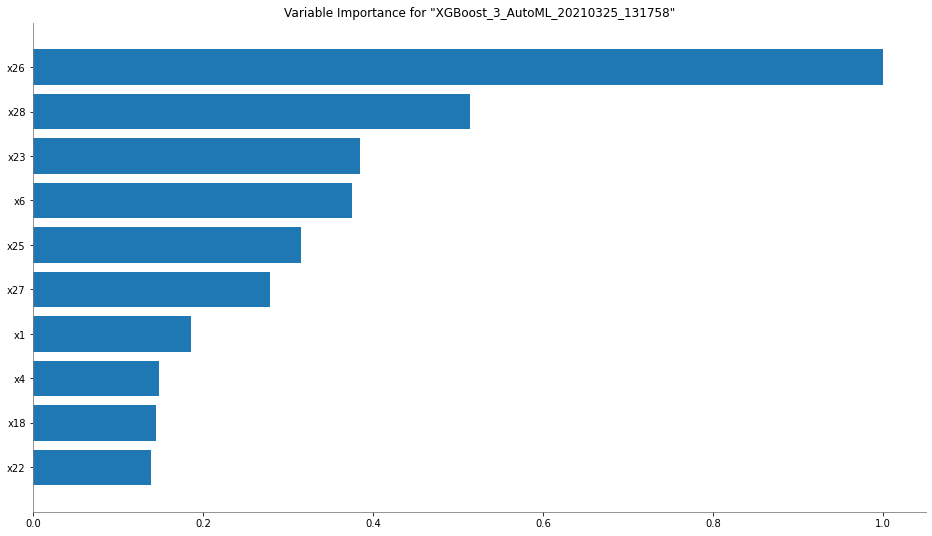

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

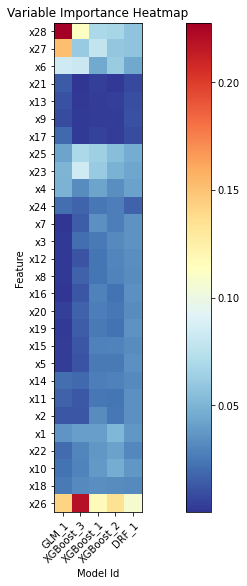

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

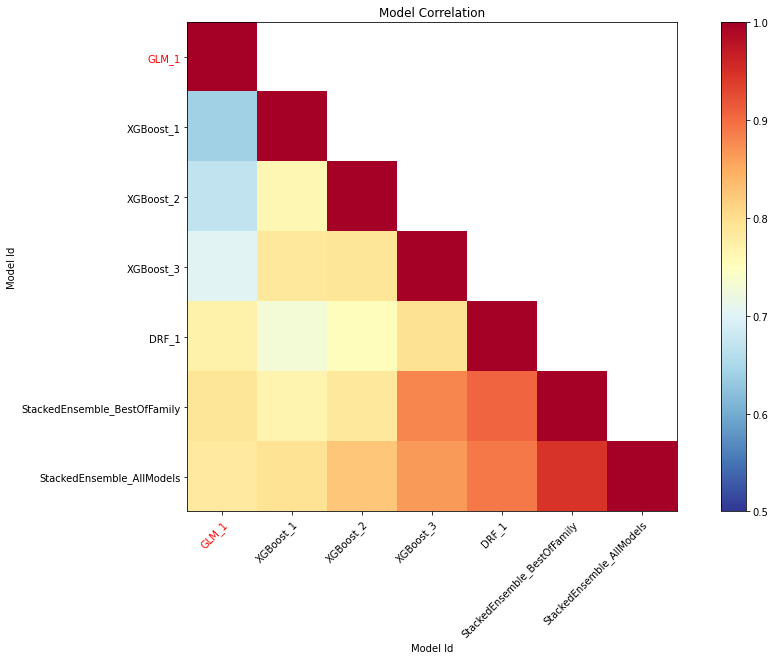

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

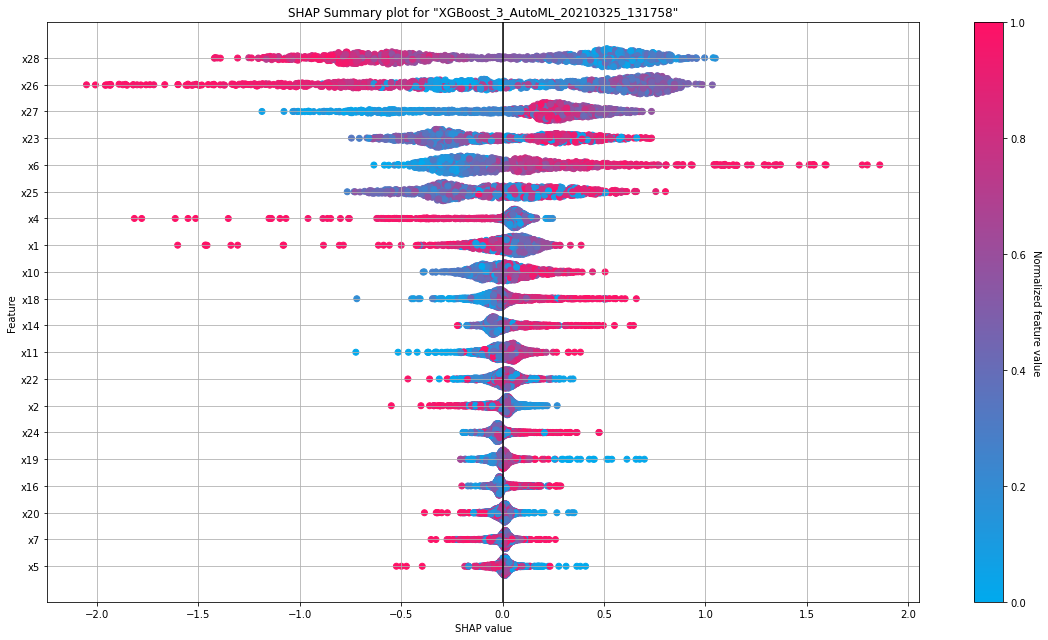

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

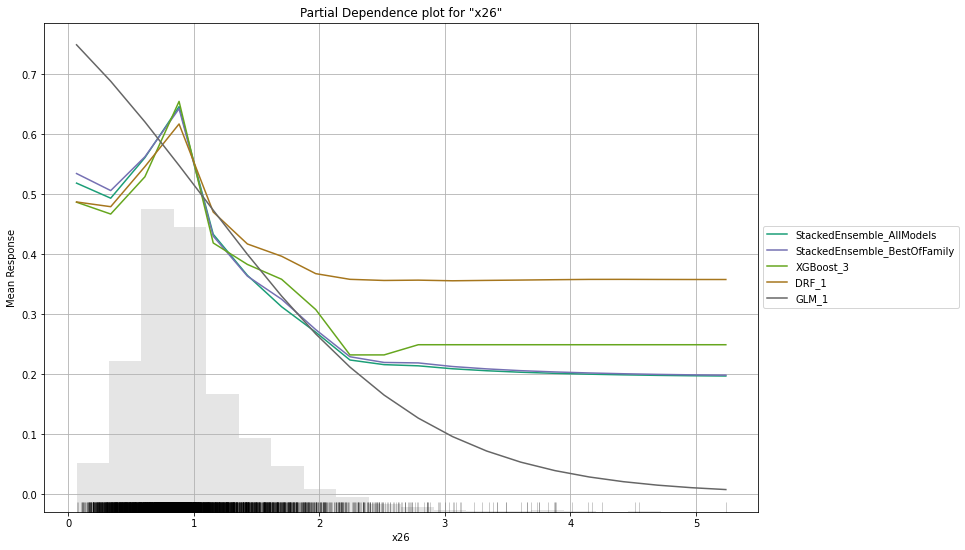

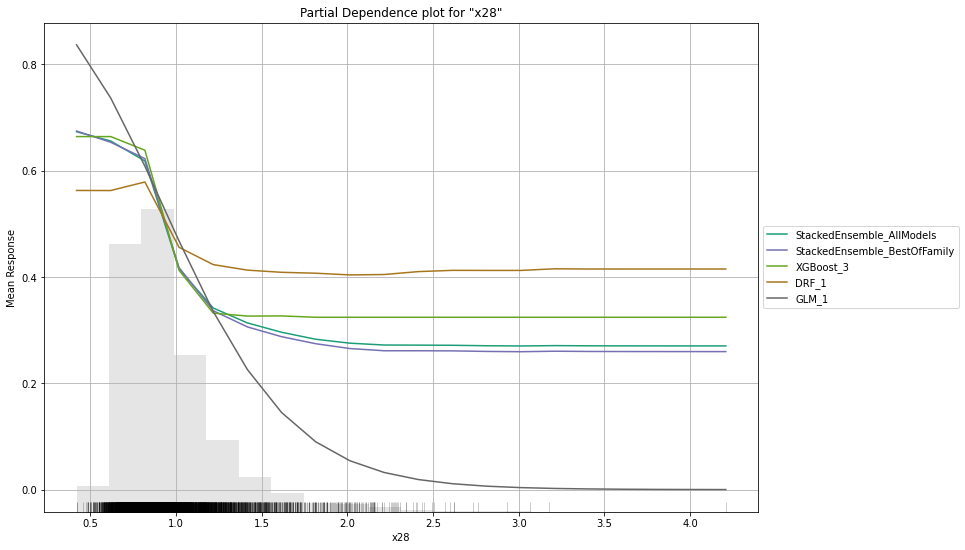

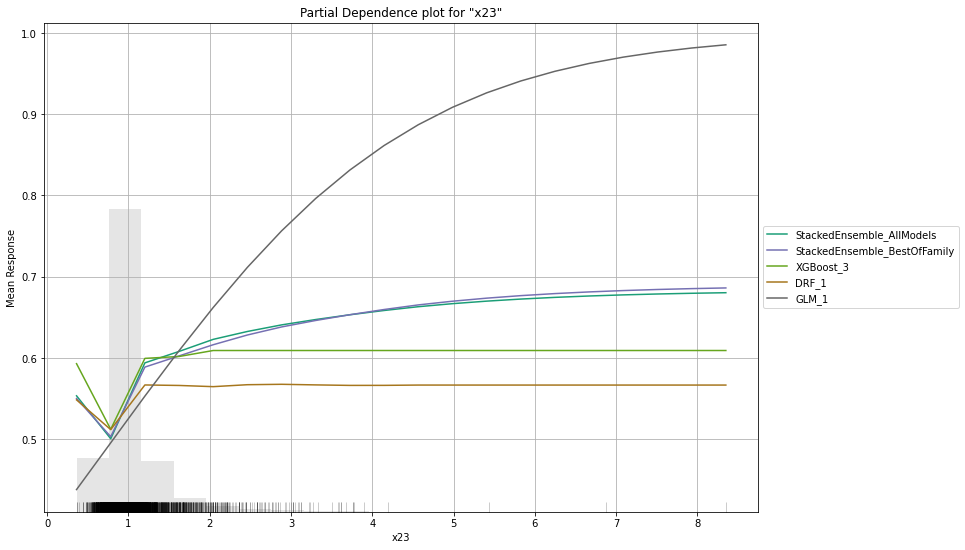

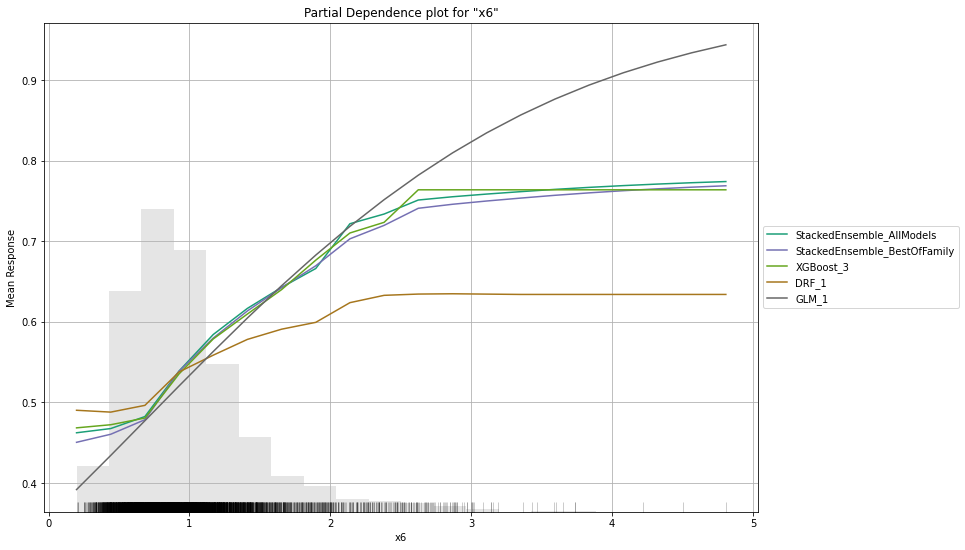

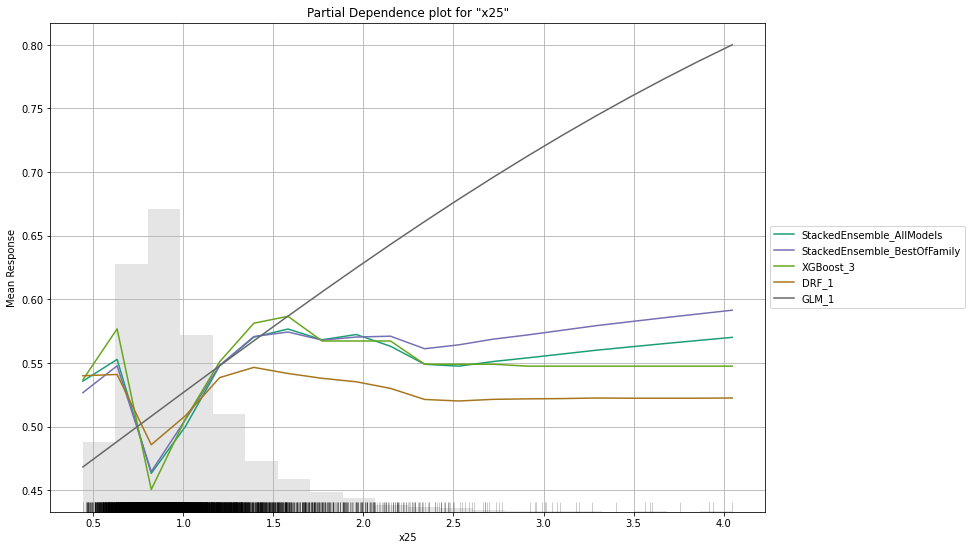

In [ ]:
# Explain a model
#exm = model.explain(test)

# Explain an AutoML object
exa = aml.explain(test)
exa

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/h2o/explanation/_explain.py:2251: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

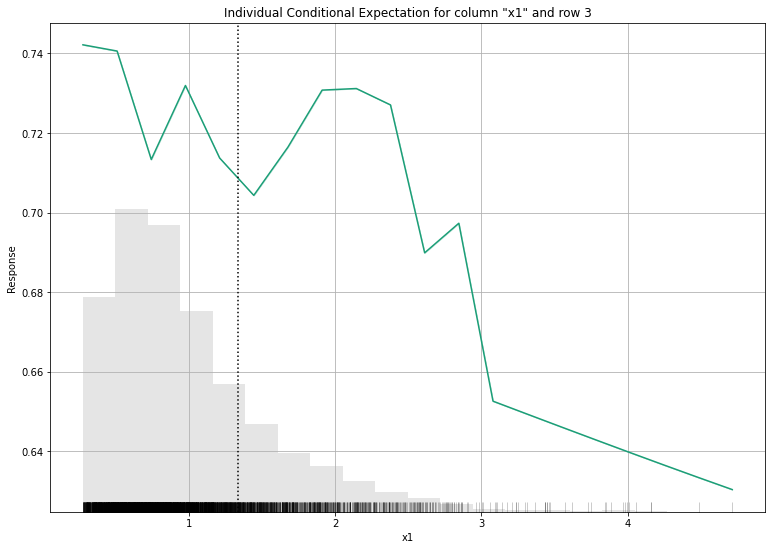

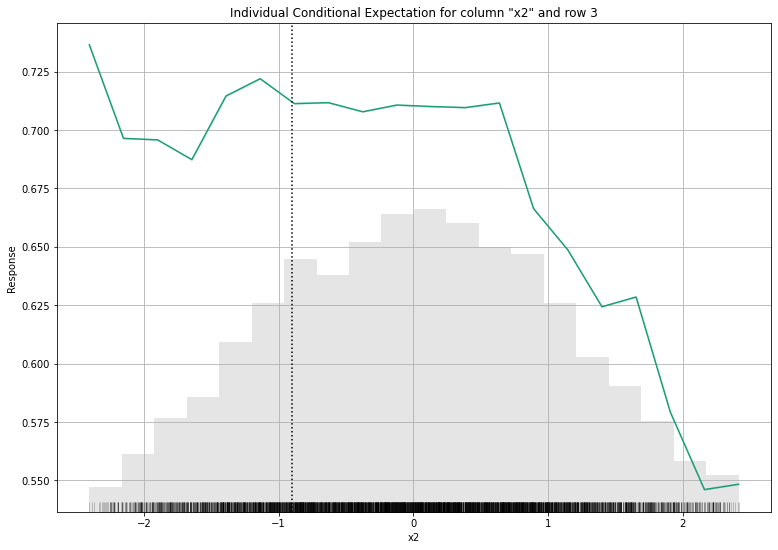

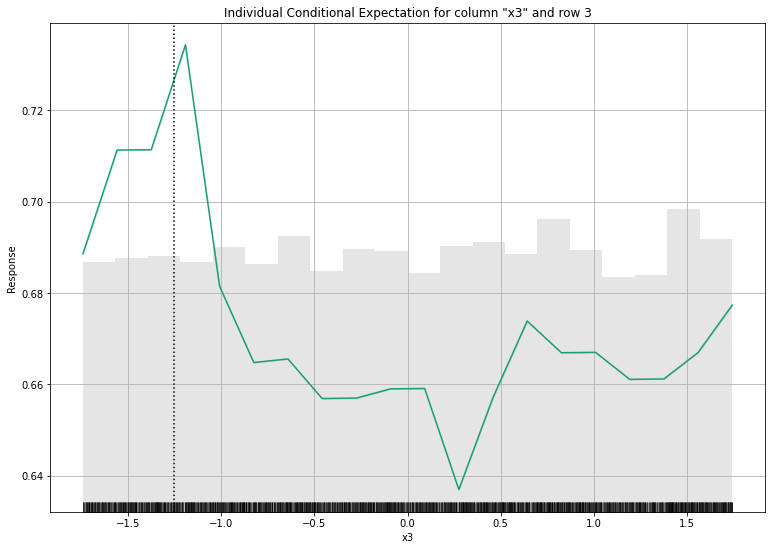

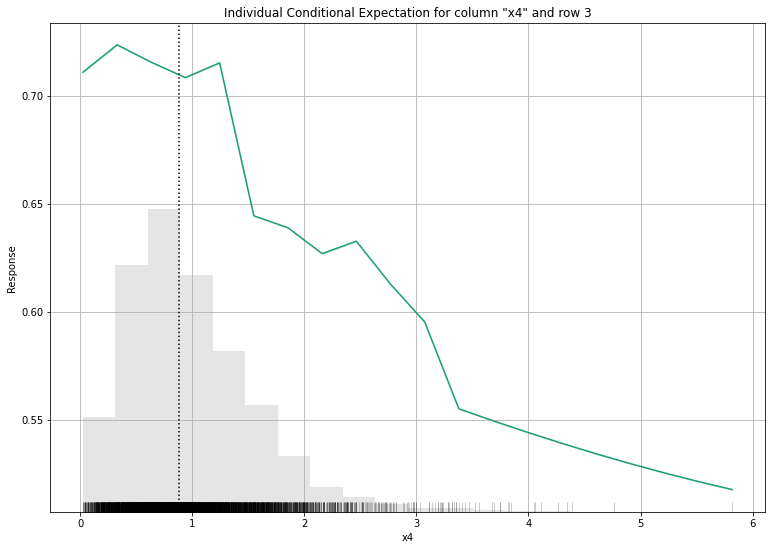

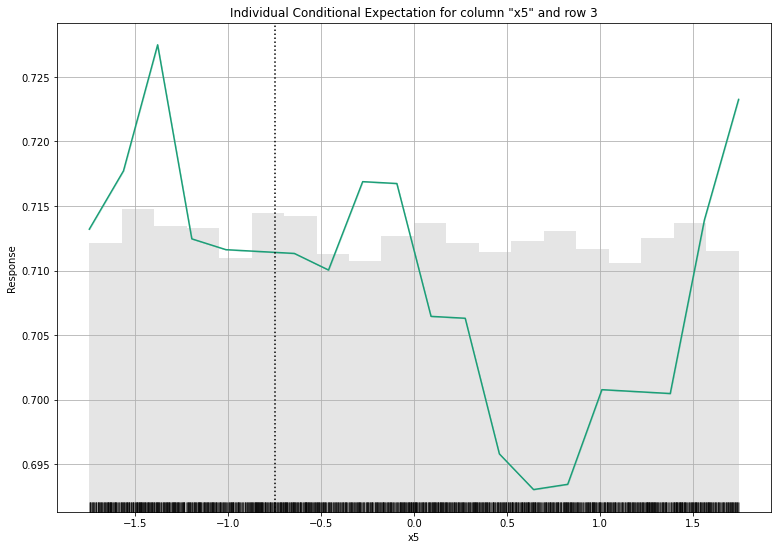

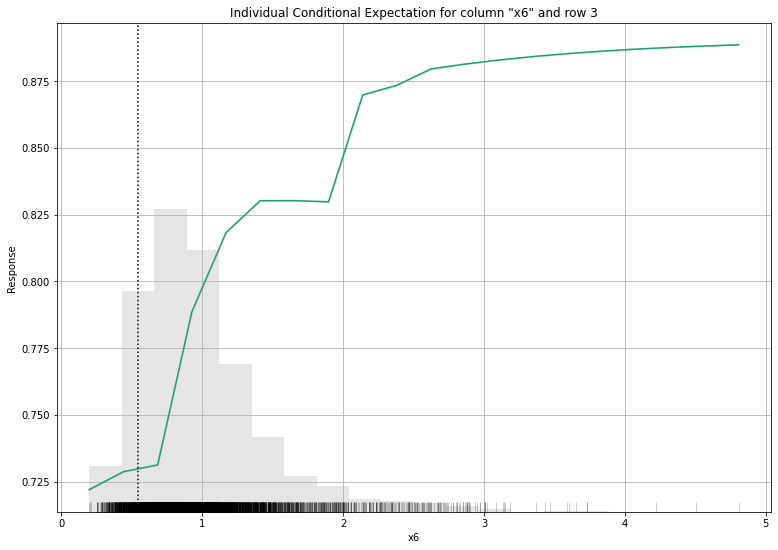

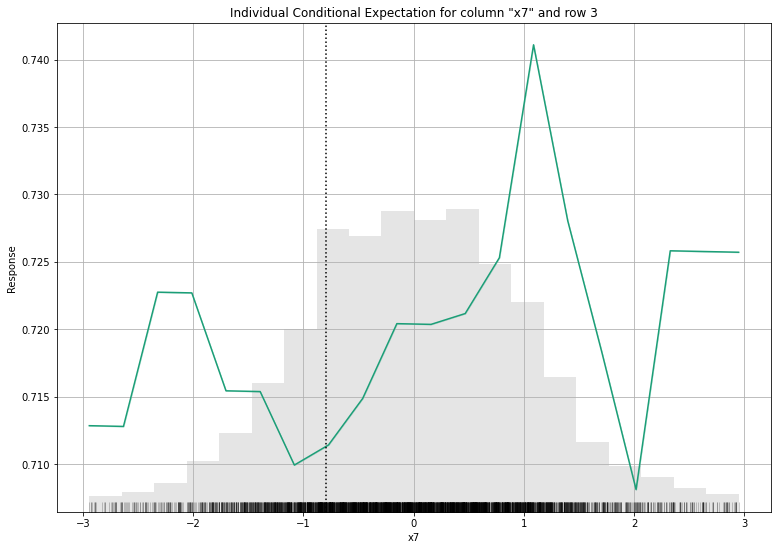

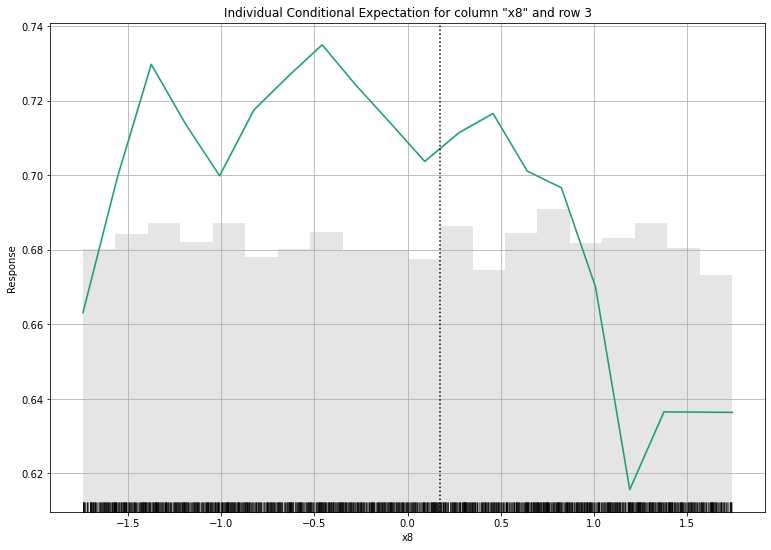

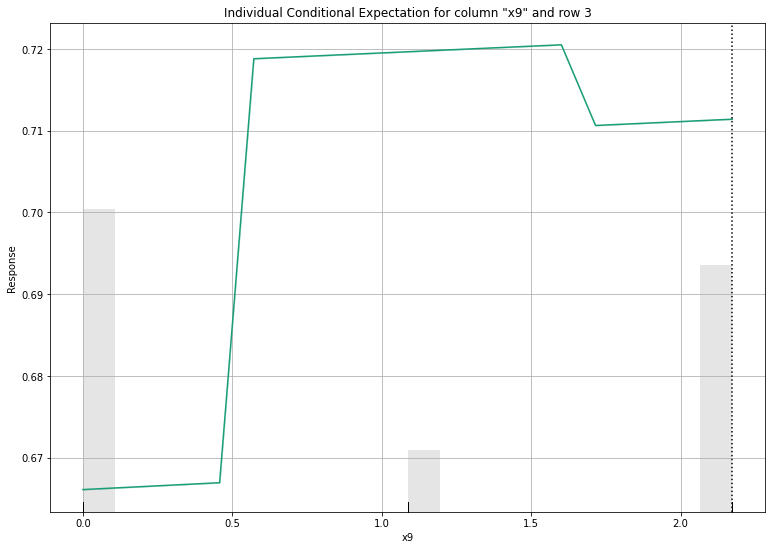

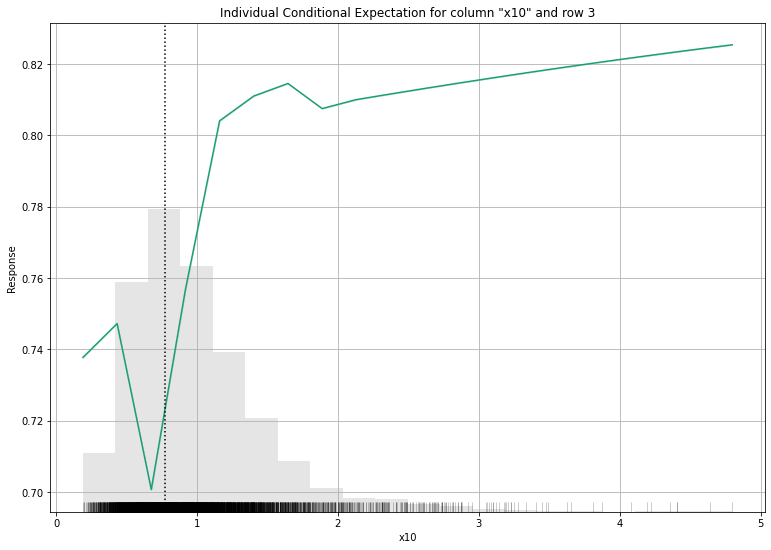

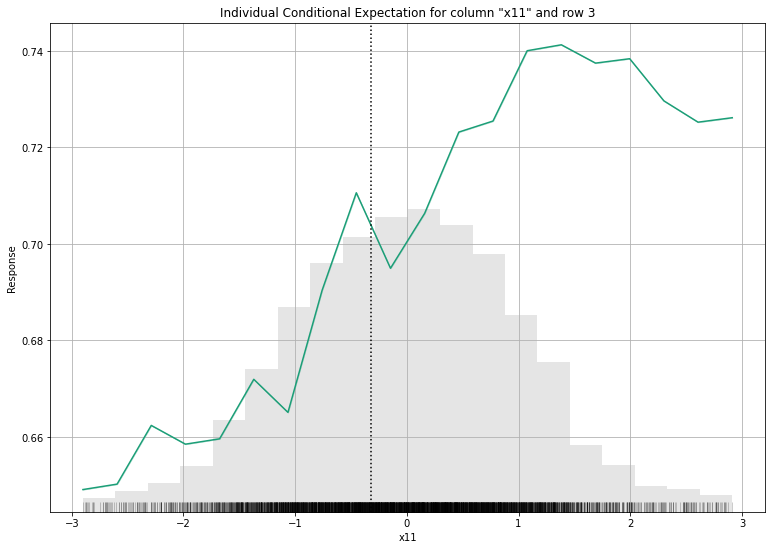

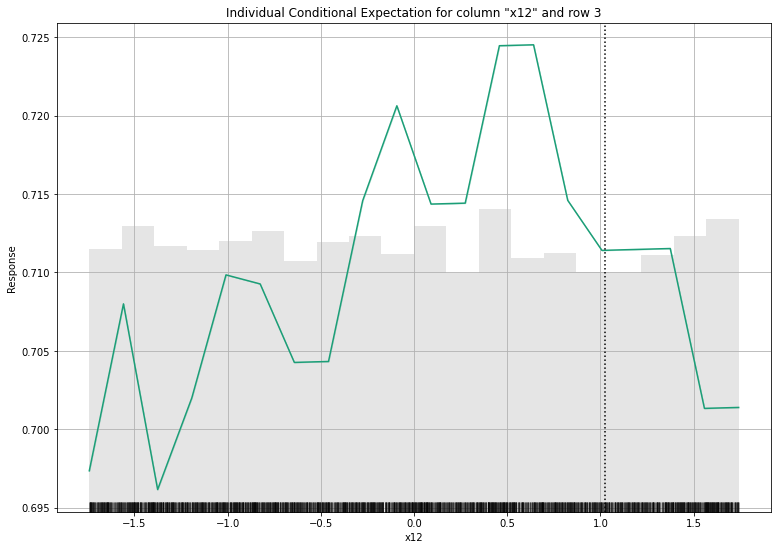

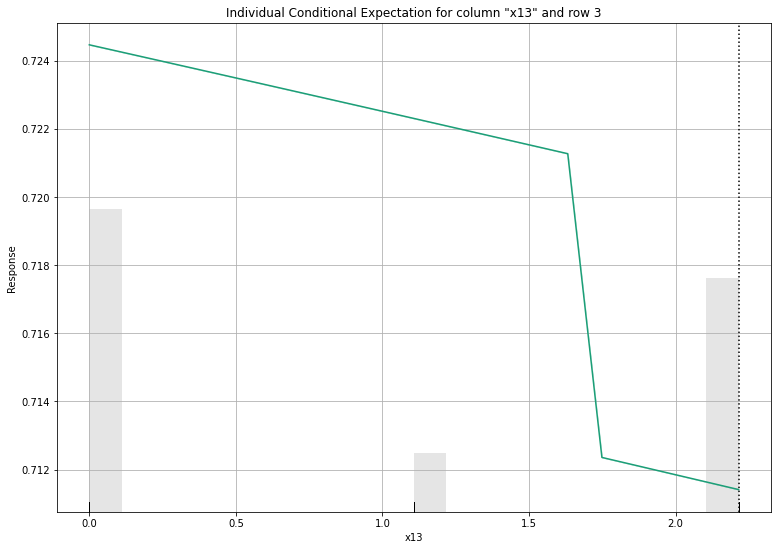

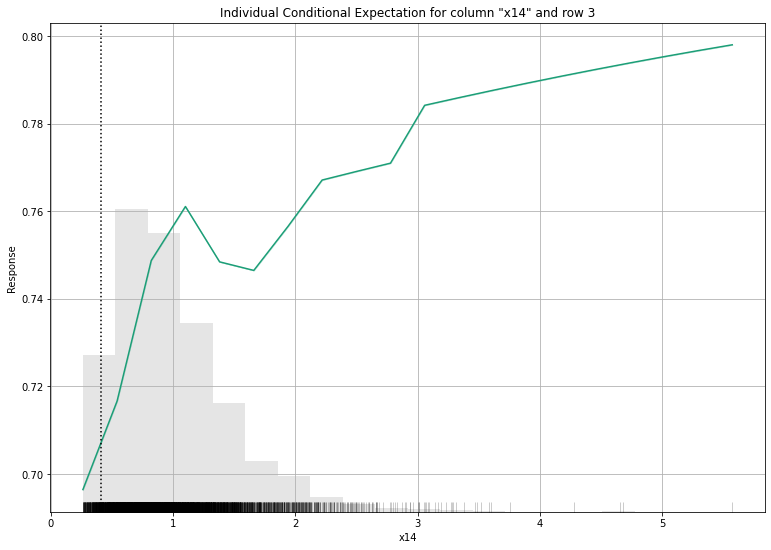

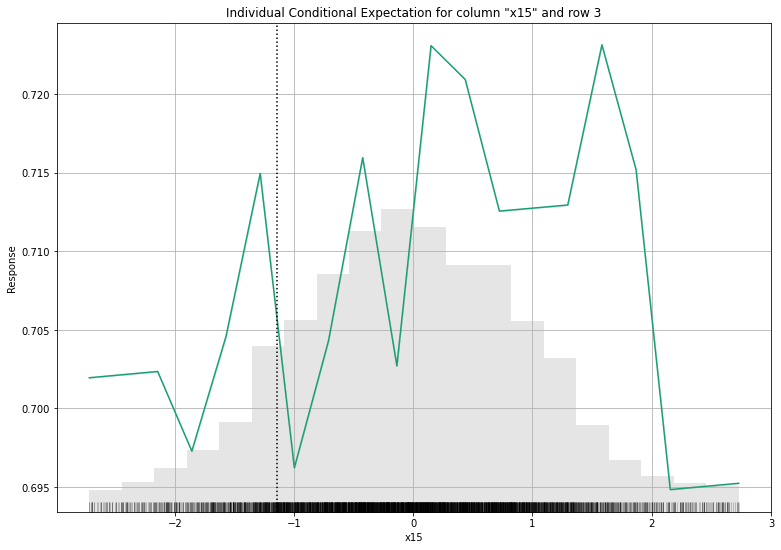

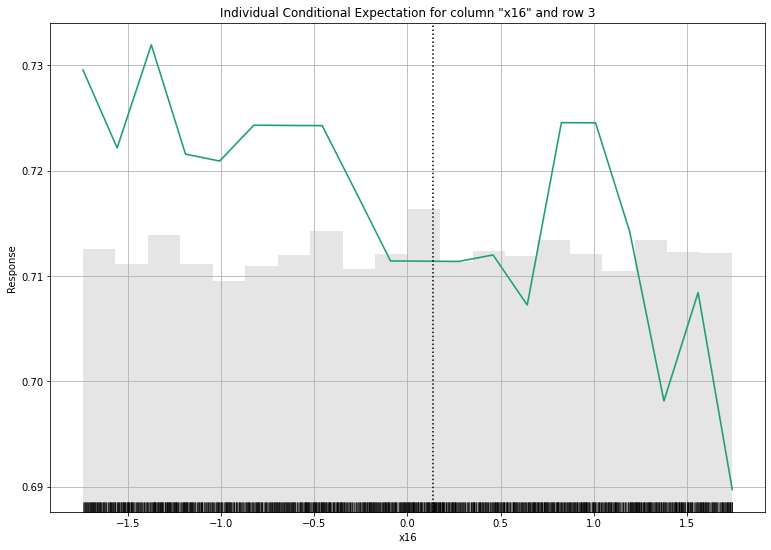

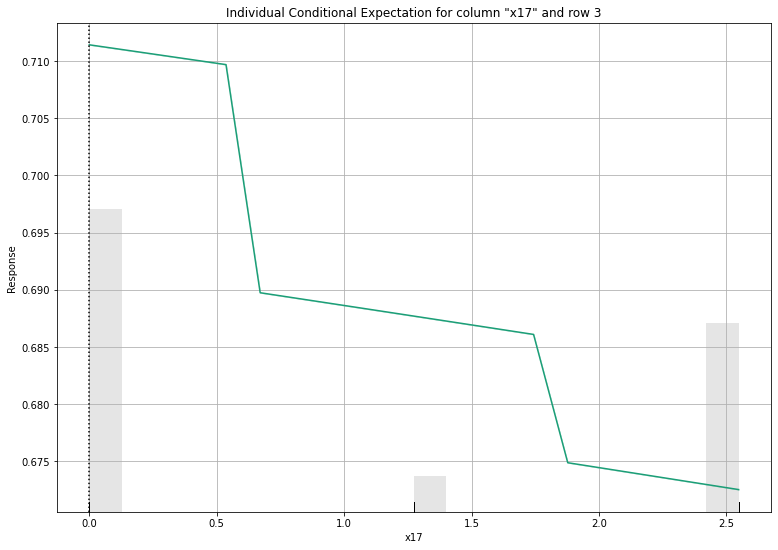

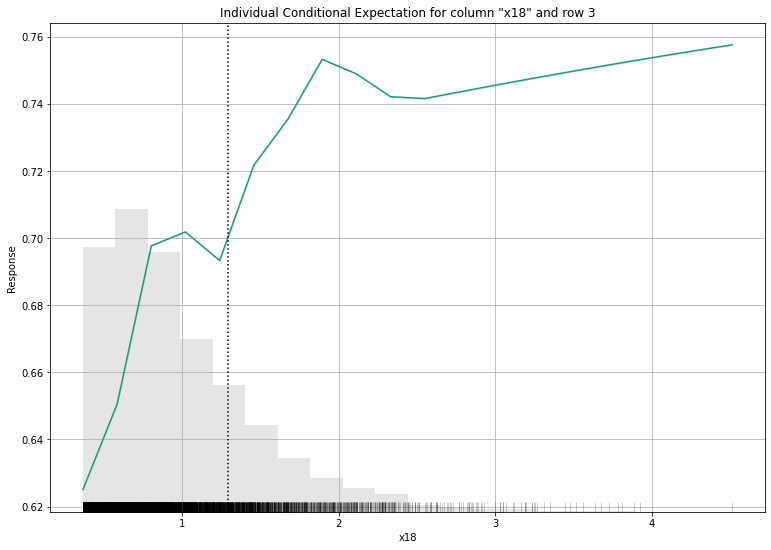

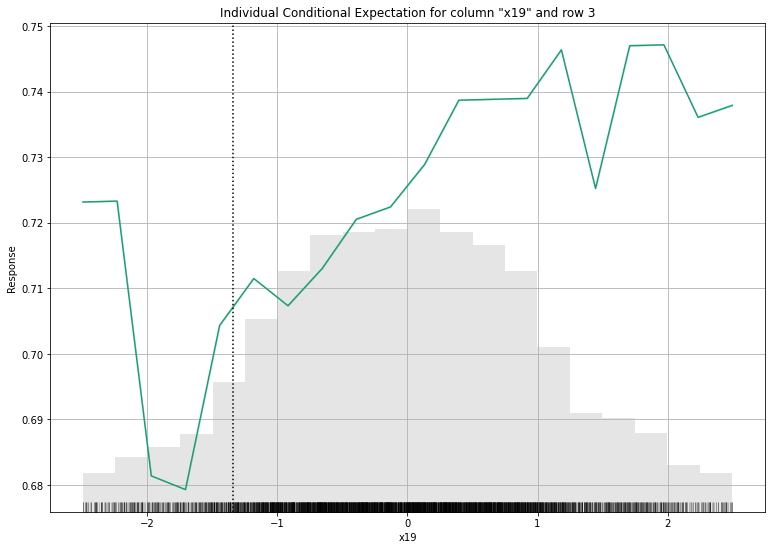

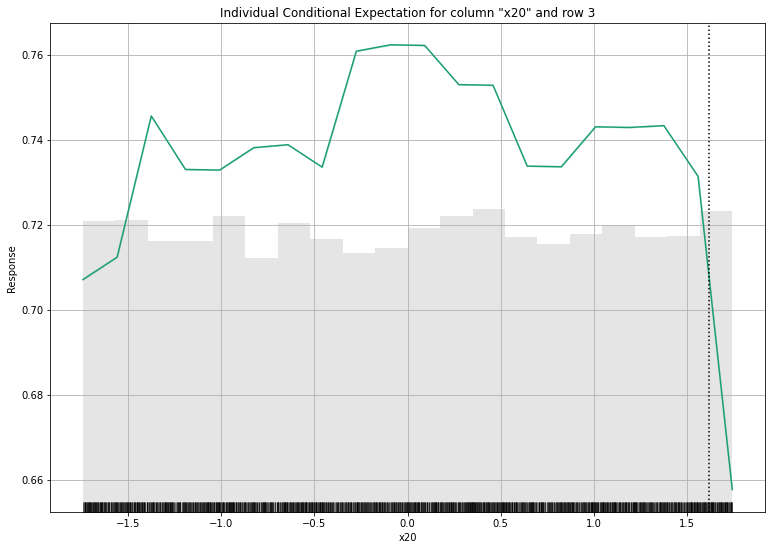

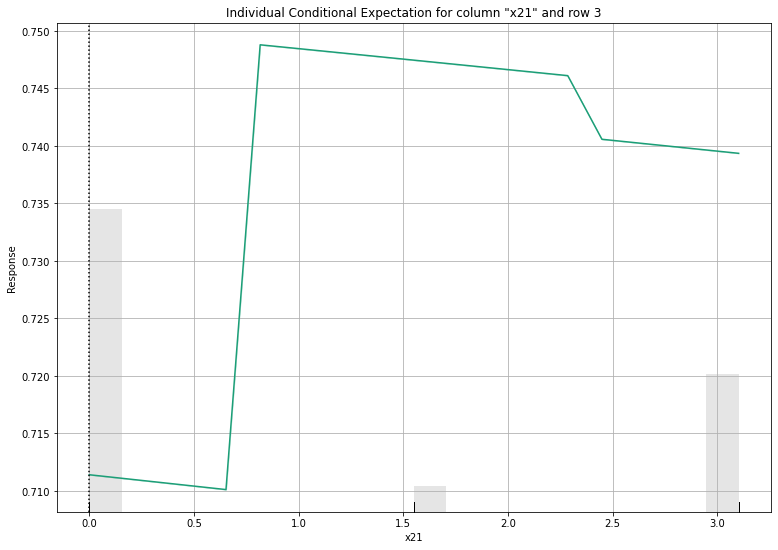

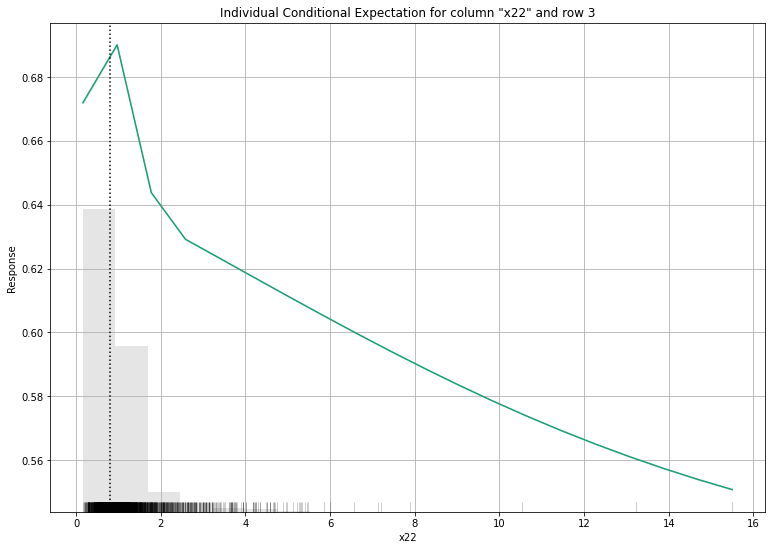

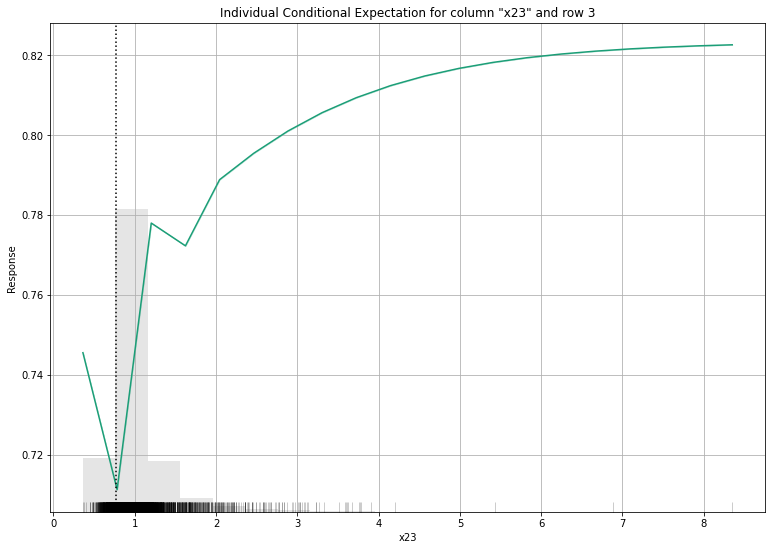

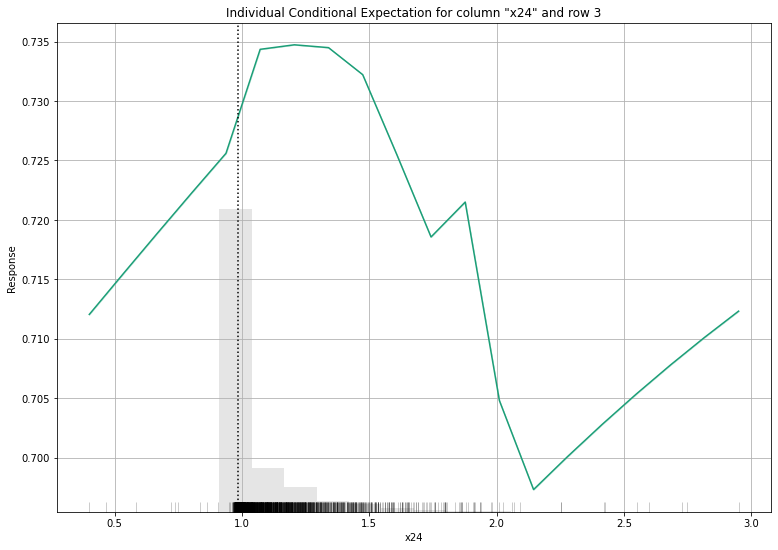

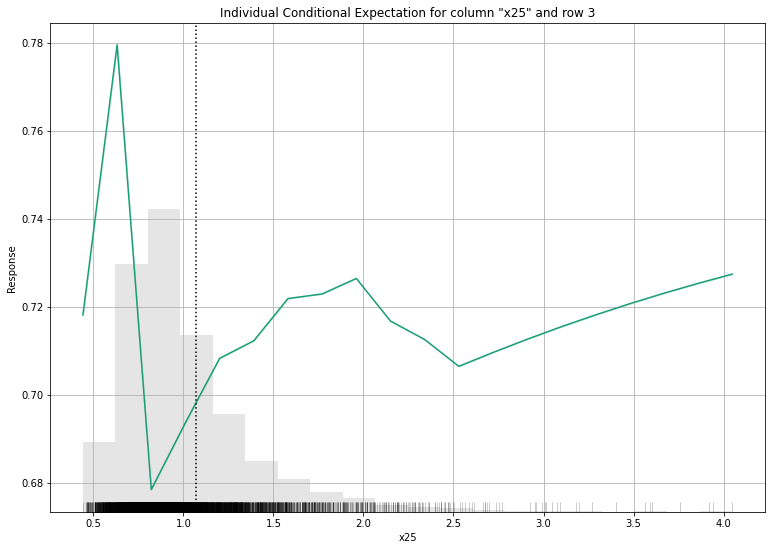

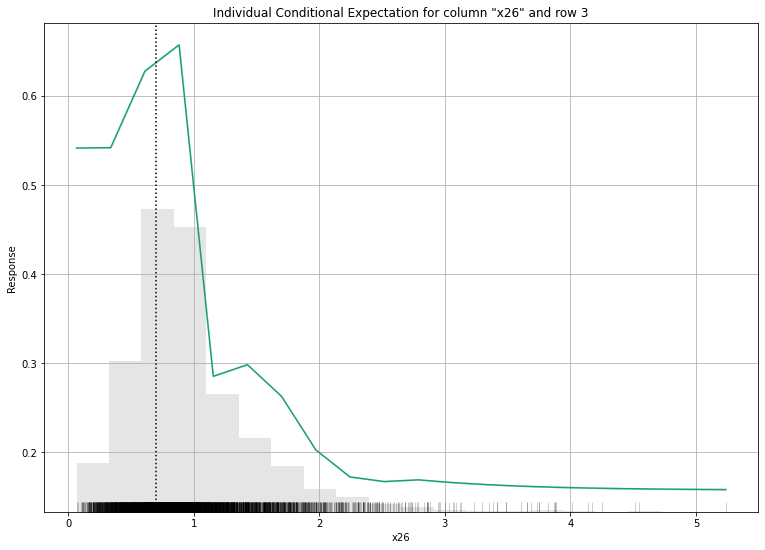

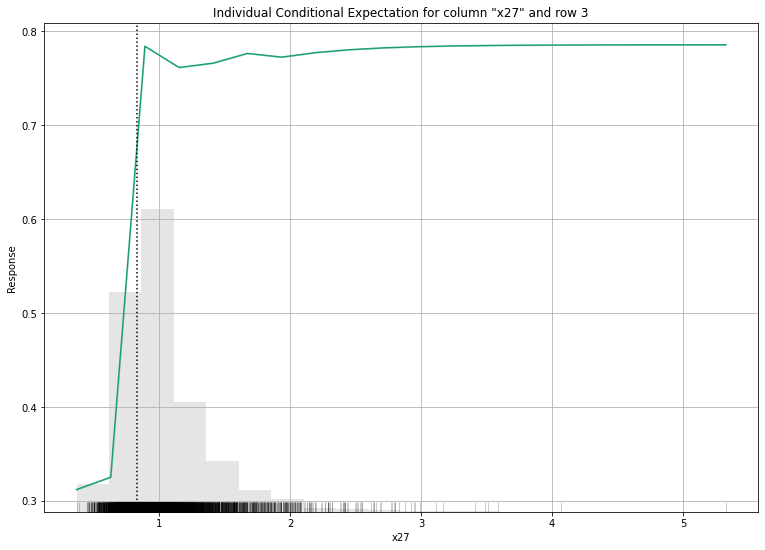

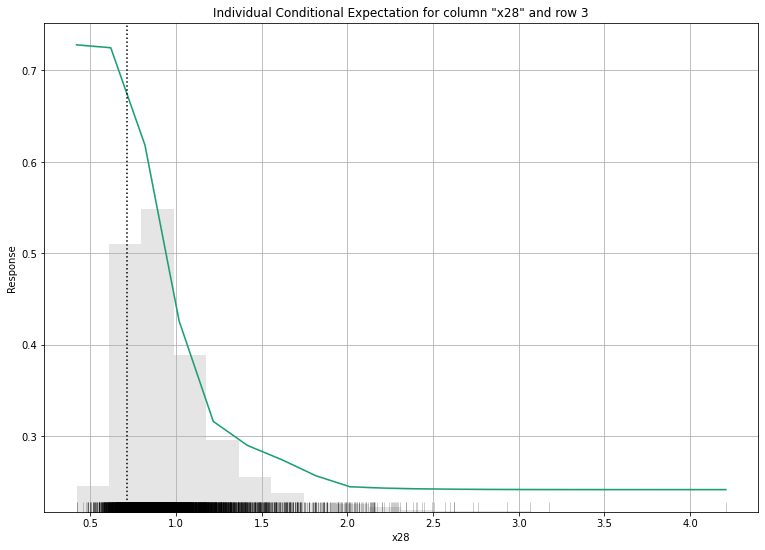

AttributeError: 'H2OAutoML' object has no attribute 'varimp_plot'

In [ ]:
#aml.explain_row(test, row_index=0)

# Explain first row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=3)

#aml.XGBoost_3_AutoML_20210325_131758

In [ ]:
test

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


## H20 - AutoML- GradientBoostingEstimator
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

In [ ]:
# Add the save location
import tempfile
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

checkpoints_dir = tempfile.mkdtemp()

h2o.init()

# Import a sample binary outcome dataset into H2O
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = data.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
data[y] = data[y].asfactor()
test[y] = test[y].asfactor()

# Split data into train & validation
ss = data.split_frame(seed = 1)
train = ss[0]
valid = ss[1]

# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],                                           
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Split data into train & validation
#ss = data.split_frame(seed = 1)
train = ss[0]
valid = ss[1]

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100, seed=1)

# Identify the grid_id and model_ids
grid_id = gbm_grid1.grid_id
old_grid_model_count = len(gbm_grid1.model_ids)

# Save the grid
saved_path = h2o.save_grid(checkpoints_dir, grid_id)

# Wipe the cloud to simulate cluster restart
#(the models will no longer be available)
h2o.remove_all()

# Retrieve the saved grid
grid = h2o.load_grid(saved_path)
grid

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,48 mins 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,15 hours and 2 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_eqf7k3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.108 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Grid Build progress: |████████████████████████████████████████████████| 100%
     col_sample_rate  ...           model_ids             logloss
0                0.5  ...  gbm_grid1_model_29  0.5518841195497567
1                1.0  ...  gbm_grid1_model_30  0.5532519194072766
2                1.0  ...  gbm_grid1_model_24  0.5535968440583772
3                1.0  ...   gbm_grid1_model_6  0.5537787805597869
4                0.5  ...  gbm_grid1_model_11  0.5552990538781677
5                1.0  ...  gbm_grid1_model_12  0.5567215084062703
6                0.5  ...  gbm_grid1_model_23  0.5587165438138675
7                0.2  ...  gbm_grid1_model_28  0.5587762302860478
8                0.5  ...   gbm_grid1_model_5  0.5593549542250685
9                0.2  ...  gbm_grid1_model_10  0.5609357871659617
10               0.5  ...  gbm_

In [ ]:
h2o.shutdown()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_ba37 closed.


# 3. AutoML-  Hyperopt-Sklearn 
https://machinelearningmastery.com/automl-libraries-for-python/ 

In [87]:
#!pip install hpsklearn
!pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

  Cloning https://github.com/hyperopt/hyperopt-sklearn.git to /tmp/pip-req-build-wyrb6oq9
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn.git /tmp/pip-req-build-wyrb6oq9
  Created wheel for hpsklearn: filename=hpsklearn-0.0.3-cp37-none-any.whl size=26994 sha256=8dfd00e83236eea839d96ae89722b6ef5f13410d25fdf74cc36389599bed8146
  Stored in directory: /tmp/pip-ephem-wheel-cache-q1xrwovo/wheels/28/93/20/67dca95c2aaa13466b4900ba79a7bab66022e50ce44f8a438d
Successfully built hpsklearn
  Found existing installation: hpsklearn 0.1.0
    Uninstalling hpsklearn-0.1.0:
      Successfully uninstalled hpsklearn-0.1.0


## load data

In [2]:
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split


sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=5000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=50)

#sensor_no_failure.head(30)

sensor_failure_all= sensor_failure.append(sensor_no_failure)
sensor_failure_all.head(20)
sensor_failure_all

Xs=sensor_failure_all[["S18",	"S16"	]]	
ys=sensor_failure_all['EQUIPMENT_FAILURE']
sensor_failure_all.head(10)


Xsensor=sensor_failure_all[[ 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18', 'S8']]
Xsensor

X_train, X_test, y_train, y_test = train_test_split(Xsensor, ys, test_size=0.33, random_state=1)



## chose for classifier , but search for any of them

In [20]:

from hpsklearn import HyperoptEstimator, extra_trees
#from sklearn.datasets import fetch_mldata

#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784', version=1, cache=True)

from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets

from hpsklearn import HyperoptEstimator, random_forest, svc, knn
from hyperopt import hp
from hpsklearn import HyperoptEstimator, any_sparse_classifier, tfidf

# example of hyperopt-sklearn for a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from hpsklearn import HyperoptEstimator, pca



# define dataset
#X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define search


# perform the search
#model.fit(X_train, y_train)
#X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(Xsensor, ys, test_size=0.33)

"""
  clf = hp.pchoice( 'my_name', 
          [ ( 0.4, random_forest('my_name.random_forest') ),
            ( 0.3, svc('my_name.svc') ),
            ( 0.3, knn('my_name.knn') ) ]
"""

clf = hp.pchoice( 'my_name', 
          [ ( 0.4, random_forest('my_name.random_forest') ),
            ( 0.3, svc('my_name.svc') ),
            ( 0.3, knn('my_name.knn') ) ])

#estim = HyperoptEstimator( preprocessing=[ pca('my_pca') ] )

#estim = HyperoptEstimator( classifier=clf )
#estim = HyperoptEstimator( classifier=any_classifier('clf'),preprocessing=[tfidf('tfidf')],  
 #                           algo=tpe.suggest, trial_timeout=300)
#
# Instantiate a HyperoptEstimator with the search space and number of evaluations

estim = HyperoptEstimator()

#estim = HyperoptEstimator(algo=tpe.suggest, 
 #                           max_evals=30, 
  #                          trial_timeout=40)

#classifier=clf )
                          #algo=tpe.suggest,
                          #max_evals=10,
                          #trial_timeout=40)

# Search the hyperparameter space based on the data
#estim.fit(X,y )
estim.fit(Xsensor.values,ys.values )

# Show the results

print("accuracy scoring: ",  estim.score(X_train, y_train))
# 0.962785714286 

print(estim.best_model())



100%|██████████| 1/1 [00:00<00:00,  2.81it/s, best loss: 0.0]
accuracy scoring:  0.8947368421052632
{'learner': RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=9,
                       n_estimators=120, n_jobs=1, random_state=3,
                       verbose=False), 'preprocs': (PCA(n_components=9, whiten=True),), 'ex_preprocs': ()}


## show best model

In [7]:


estim.best_model()



{'ex_preprocs': (),
 'learner': RandomForestClassifier(criterion='entropy', max_features=0.7256776960973639,
                        min_samples_leaf=7, n_estimators=111, n_jobs=1,
                        random_state=2, verbose=False),
 'preprocs': (PCA(n_components=8),)}

In [ ]:
#pip install hpsklearn

In [49]:
X_train.dtypes

S15                 float64
S17                 float64
S13                 float64
S5                  float64
S16                 float64
S19                 float64
S18                 float64
S8                  float64
AGE_OF_EQUIPMENT      int64
dtype: object

# test models parameters

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_


kmeans

KMeans(n_clusters=2, random_state=0)

In [75]:
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=5, random_state=1)
X.shape

(100, 10)